In [1]:
from utils import crop_roi, plot_image_grid
from dataloaders import create_dataloaders
import numpy as np
import torch

In [2]:
resnet_mean = torch.tensor([0.485, 0.456, 0.406])
resnet_std =  torch.tensor([0.229, 0.224, 0.225])
train_loader, val_loader, test_loader = create_dataloaders(normalize=True, limit=None, mean=resnet_mean, std=resnet_std)

--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 1 with 5364 images.
--Data Balance-- The second common class is 3 with 890 images with a difference of 4474 images from the most common class.
--Data Balance (Undersampling)-- Keeping 5364 from 1 class..
--Data Balance (Undersampling)-- 1 now has 5364 images
-- Data Balance (Oversampling) -- Adding 4485 from 0 class..
-- Data Balance (Oversampling) -- Adding 5102 from 2 class..
-- Data Balance (Oversampling) -- Adding 4474 from 3 class..
-- Data Balance (Oversampling) -- Adding 4953 from 4 class..
-- Data Balance (Oversampling) -- Adding 5272 from 5 class..
-- Data Balance (Oversampling) -- Adding 5250 from 6 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images shape is torch.Size([64, 3, 224, 224])


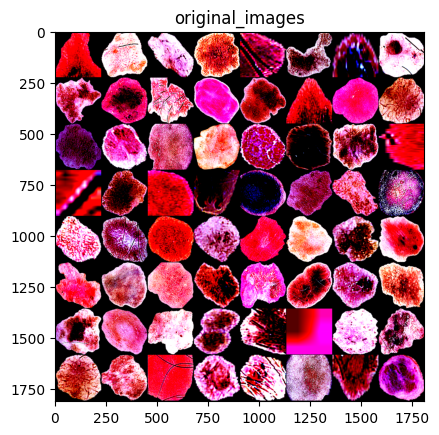

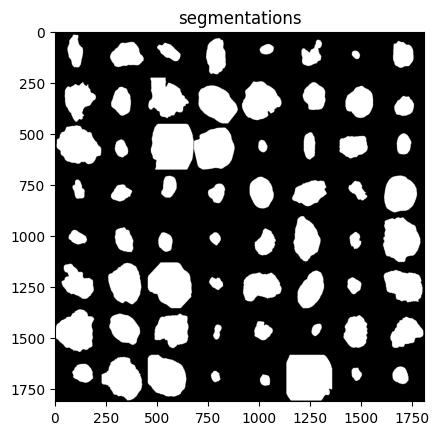

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


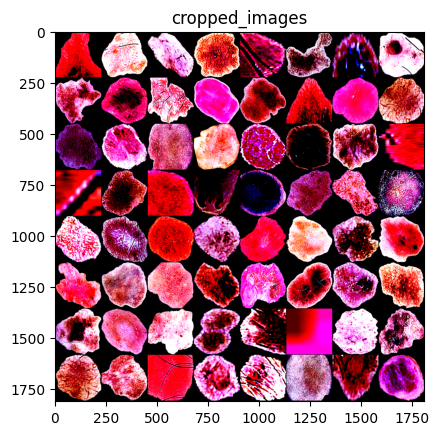

UnboundLocalError: local variable 'image' referenced before assignment

In [4]:
for tr_i, (tr_images, tr_labels, segmentations) in enumerate(train_loader):
    tr_images = torch.mul(tr_images, segmentations)
    print(f"Images shape is {tr_images.shape}")
    tr_images = crop_roi(tr_images, size=(224,224))
    plot_image_grid(tr_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(tr_images, "cropped_images")
    break
for val_i, (val_images, val_labels, segmentations) in enumerate(val_loader):
    val_images = torch.mul(val_images, segmentations)
    print(f"Images shape is {val_images.shape}")
    val_images = crop_roi(val_images, size=(224,224))
    plot_image_grid(val_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(val_images, "cropped_images")
    break